
### Exercise 1 -  Use data from Danmarks Statistik - Databanken

1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:

A) Check the result

B) In the code below this same get request is used to get information about all available data tables in 'databanken'.

4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

A) What is the change in pct of divorced danes from 2008 to 2020?

In [2]:
import pandas as pd

df = pd.read_csv('divorced_danes.csv', delimiter=';')
year = df.TID
number_of_divorced = df.INDHOLD

print("Year: " + str(year[0][:4]) + "\nDivorced danes: " + str(number_of_divorced[0]))
print("\nYear: " + str(year[1][:4]) + "\nDivorced danes: " + str(number_of_divorced[1]))

pct = (number_of_divorced.pct_change() * 100)[1]
print("\nDivorced danes from " + str(year[0][:4]) + " to " + str(year[1][:4]) + " are: " + str(int(pct)) + " %")


Year: 2008
Divorced danes: 428864

Year: 2020
Divorced danes: 544588

Divorced danes from 2008 to 2020 are: 26 %


B) Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [124]:
df = pd.read_csv('never_married.csv', delimiter=";")

data = df.INDHOLD

cph = int((data[1] / data[0]) * 100)
print("In Copenhagen " + str(cph) + " % is not married")

aalborg = int((data[3] / data[2]) * 100)
print("In Aalborg " + str(aalborg) + " % is not married")

odense = int((data[5] / data[4]) * 100)
print("In Odense " + str(odense) + " % is not married")

vejle = int((data[7] / data[6]) * 100)
print("In Vejle " + str(vejle) + " % is not married")

aarhus = int((data[9] / data[8]) * 100)
print("In Aarhus " + str(aarhus) + " % is not married")

print("\n\nThe city with most not married people is: " + str(df.OMRÅDE[0]) + " with " + str(cph) + " %")


In Copenhagen 65 % is not married
In Aalborg 54 % is not married
In Odense 54 % is not married
In Vejle 47 % is not married
In Aarhus 59 % is not married


The city with most not married people is: København with 65 %


C) Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

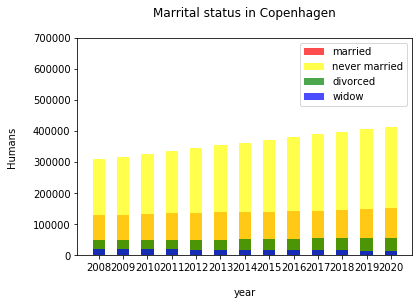

In [81]:
import matplotlib.pyplot as plt

df = pd.read_csv("marriage_change_cph.csv", delimiter=";")

df_married = df[df.CIVILSTAND == "Gift/separeret"]
df_not_married = df[df.CIVILSTAND == "Ugift"]
df_divorced = df[df.CIVILSTAND == "Fraskilt"]
df_widow = df[df.CIVILSTAND == "Enke/enkemand"]

def setup_plot():
    plt.title("Marrital status in Copenhagen\n")
    plt.xlabel("\nyear", fontsize=10)
    plt.ylabel("Humans\n", fontsize=10)
    
def plot_histogram(xs, ys, label, color):
    plt.bar(xs, ys, label=label, alpha=0.7, width=0.5, linewidth=0, align='center', color=color)


setup_plot()
plot_histogram(df_married.TID.str[:4], df_married.INDHOLD,"married", "red")
plot_histogram(df_not_married.TID.str[:4], df_not_married.INDHOLD,"never married", "yellow")
plot_histogram(df_divorced.TID.str[:4], df_divorced.INDHOLD,"divorced", "green")
plot_histogram(df_widow.TID.str[:4], df_widow.INDHOLD, "widow", "blue")

plt.ylim([0, 700000])
plt.legend(loc=1)
plt.plot()
plt.show()


D) Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

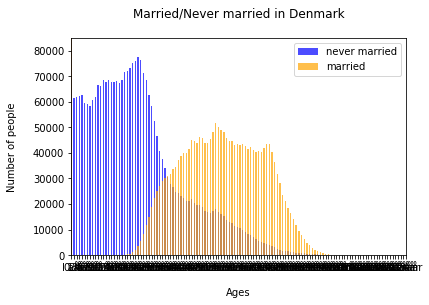

In [17]:
df = pd.read_csv("married_and_not.csv", delimiter=";")

df_married = df[df.CIVILSTAND == "Gift/separeret"]
df_not_married = df[df.CIVILSTAND == "Ugift"]

def setup_plot():
    plt.title("Married/Never married in Denmark\n")
    plt.xlabel("\nAges")
    plt.ylabel("Number of people\n")
    plt.axis([0, 125, 0, 85000])
    
setup_plot()

#The function plot_histogram is defined in the exercise above
plot_histogram(df_not_married.ALDER, df_not_married.INDHOLD, "never married", "blue")
plot_histogram(df_married.ALDER, df_married.INDHOLD, "married", "orange")

plt.legend()
plt.plot()
plt.show()


### Exercise 2 - use another table

Go to https://www.dst.dk/da/Statistik/statistikbanken/api

Choose any of the other tables in 'databanken' to find interesting data.

1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots


I'm collecting data from the table FOLK3 

#### 1. How many people in percent were born the 8.april compared to 2008 and 2020

In [10]:
df = pd.read_csv("eight_of_april.csv", delimiter=";")

info = df.INDHOLD
percent_change = info.pct_change() * 100

print("The total increment of people born the 8. april from 2008 to 2020 are: " + str(int(percent_change[1])) + " %")



The total increment of people born the 8. april from 2008 to 2020 are: 4 %


#### 2.  Show a bar chart of people born in the different months in 1995, 2000, 2005 and 2010

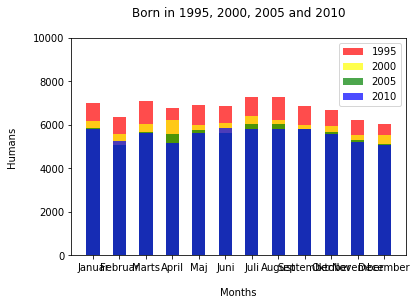

In [25]:
import matplotlib.pyplot as plt

df = pd.read_csv("born_1995_2000_2005_2010.csv", delimiter=";")

df_1995 = df[df.FODAAR == 1995]
df_2000 = df[df.FODAAR == 2000]
df_2005 = df[df.FODAAR == 2005]
df_2010 = df[df.FODAAR == 2010]

def setup_plot():
    plt.title("Born in 1995, 2000, 2005 and 2010\n")
    plt.xlabel("\nMonths", fontsize=10)
    plt.ylabel("Humans\n", fontsize=10)
    
def plot_histogram(xs, ys, label, color):
    plt.bar(xs, ys, label=label, alpha=0.7, width=0.5, linewidth=0, align='center', color=color)


setup_plot()
plot_histogram(df_1995.FMAANED, df_1995.INDHOLD,"1995", "red")
plot_histogram(df_2000.FMAANED, df_2000.INDHOLD,"2000", "yellow")
plot_histogram(df_2005.FMAANED, df_2005.INDHOLD,"2005", "green")
plot_histogram(df_2010.FMAANED, df_2010.INDHOLD, "2010", "blue")

plt.ylim([0, 10000])
plt.legend(loc=1)
plt.plot()
plt.show()


#### 3. Plot a bar to show how many people who are born the 1st of january from 1900 - 2019

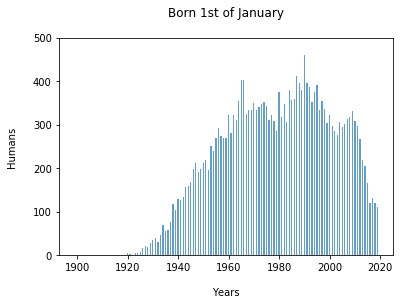

In [39]:
df = pd.read_csv("born_1_januar.csv", delimiter=";")

def setup_plot():
    plt.title("Born 1st of January\n")
    plt.xlabel("\nYears", fontsize=10)
    plt.ylabel("Humans\n", fontsize=10)
    
def plot_histogram(xs, ys):
    plt.bar(xs, ys, alpha=0.7, width=0.5, linewidth=0, align='center')


setup_plot()
plot_histogram(df.FODAAR, df.INDHOLD)


plt.ylim([0, 500])
plt.plot()
plt.show()